In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename), "\n")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushealthinsurancedataset/insurance.csv 



In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Requirements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading Data

In [4]:
df_insurance = pd.read_csv("/kaggle/input/ushealthinsurancedataset/insurance.csv")
print("Columns:", df_insurance.columns, "\n")
df_insurance.describe()

Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object') 



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Inference

From this we can understand that, our data has 1338 entries. 7 columns(parameters) namely 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'.

### Understanding the problem

### In this we have to understand 3 things. 

1. What is the problem, what I need to do with this data?
2. What is type of the problem?
3. Target Variable?


#### **1. What is the problem, what I need to do with this data?**

Goal: Predict charges (insurance cost) using other features.

#### **2. What is type of the problem?**

 How to Identify the Problem Type

You ask yourself:

 **1. What am I trying to predict?**

Look at the **target variable** (also called the output, label, or `y`).

 **2. What type of data is that target variable?**

##### Here's a quick decision guide:

| Target Variable Type         | Example                                        | Problem Type                   | ML Algorithms                                       |
| ---------------------------- | ---------------------------------------------- | ------------------------------ | --------------------------------------------------- |
| **Numeric (continuous)**     | Insurance charges, house prices, temperature   | **Regression**                 | Linear Regression, Random Forest Regressor, XGBoost |
| **Categorical (2 classes)**  | Yes/No, True/False, Buy/Not Buy                | **Binary Classification**      | Logistic Regression, Decision Tree, SVM             |
| **Categorical (>2 classes)** | Species (cat/dog/horse), Regions (north/south) | **Multi-class Classification** | Softmax, Random Forest, KNN                         |
| **Groups with no label**     | Customer segments                              | **Clustering (unsupervised)**  | K-Means, DBSCAN                                     |
| **Sequences or time**        | Stock prices over time                         | **Time Series Forecasting**    | ARIMA, LSTM, Prophet                                |

###### In our case:

* Your **target column** is `charges`
* It's a **continuous number** like:
  `3204.0`, `13225.6`, `42111.0`, etc.

That makes it a **regression problem**.

#### **3. Target Variable?**
Basically output of your model/analysis.

## Data Exploration (EDA)

### Check for missing values

In [5]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Inference: We dont have any missing values in this dataset. So we dont need to filter it out.

### View data types and basic stats

In [6]:
print(df_insurance.dtypes)
print(df_insurance.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Visualize distributions of age, bmi, charges

In [7]:
sns.set(style='darkgrid') # darkgrid, whitegrid, dark, white, and ticks

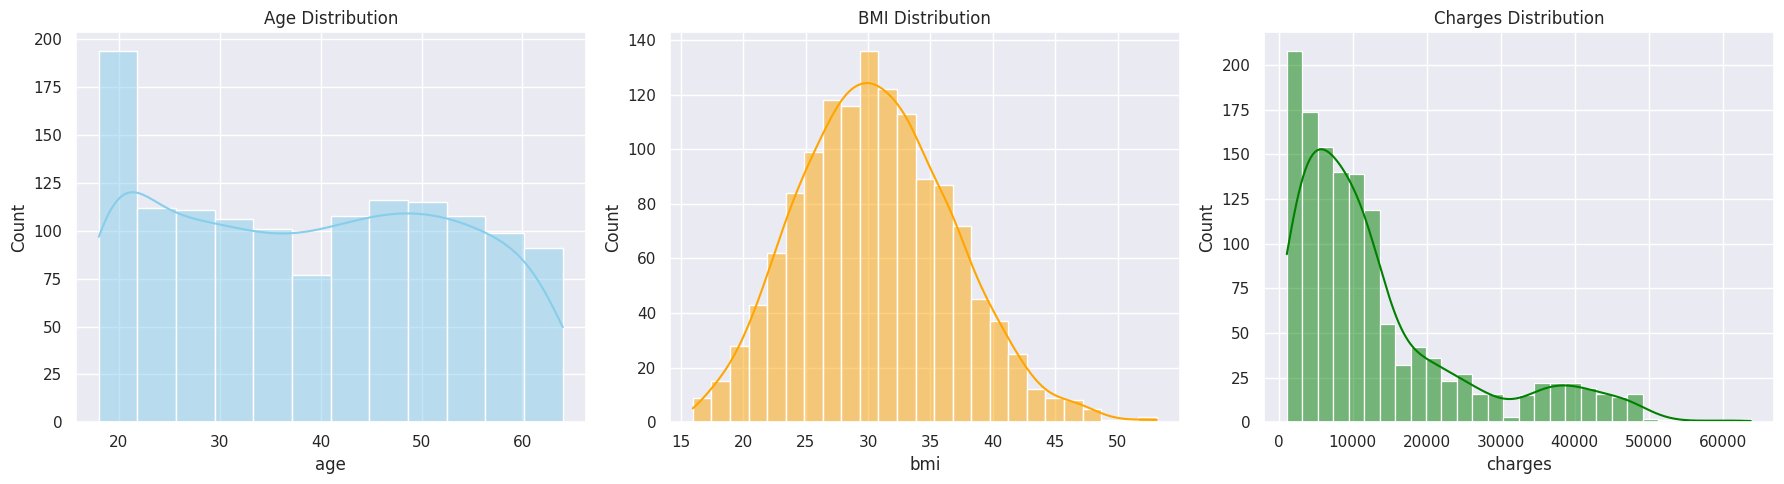

In [8]:
# fig, ax = plt.subplots(nrows, ncols, figsize=(width, height)), where nrows is the number of rows and ncols is the number of columns in your subplot grid.
fig, axes = plt.subplots(1, 3, figsize=(18,5))

#enabling kde provides use the smooth curve for better analysis

# Age
sns.histplot(df_insurance['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# BMI
sns.histplot(df_insurance['bmi'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('BMI Distribution')

# Charges
sns.histplot(df_insurance['charges'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

Inference:
1. Dataset includes a diverse age range — useful for training.
2. No need for transformation here — it's well distributed.

Inference:
1. Slight right skew (tail to the right).
2. Most people have BMI between 25–35.
3. Normal distribution-ish with some outliers above 40+
4. BMI might need scaling for modeling

Inference:
1. Heavily right-skewed (long tail on the right).

2. Most charges fall below $15,000, but some go over $50,000.

3. Indicates outliers or special subgroups

4. This is the target variable, and it's not normally distributed.

5. Might affect model performance — some models (like Linear Regression) assume normality of residuals.

6. Could try log-transforming charges later to reduce skew.

### Explore Relationships

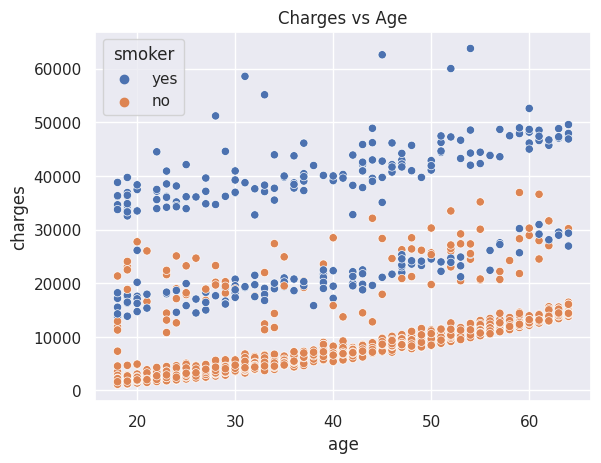

In [9]:
sns.scatterplot(data=df_insurance, x='age', y='charges', hue='smoker')
plt.title('Charges vs Age')
plt.show()

Inference:

1. Smoker status and age both matter for predicting charges.

2. Strong interaction effect: A 25-year-old smoker may pay more than a 60-year-old non-smoker.



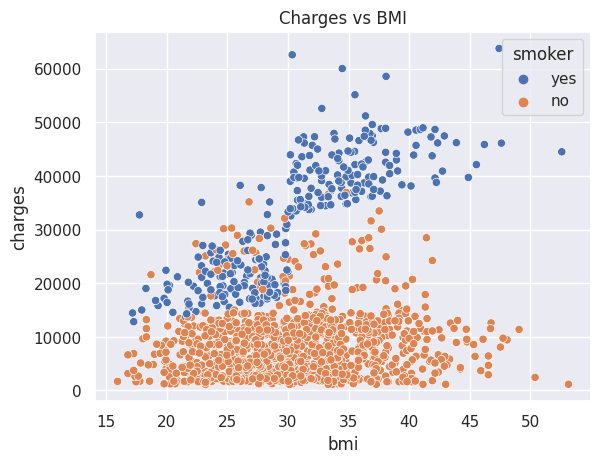

In [10]:
sns.scatterplot(data=df_insurance, x='bmi', y='charges', hue='smoker')
plt.title('Charges vs BMI')
plt.show()

Inference:

1. Non-smokers stay in a tight charge range, even with increasing BMI.

2. For smokers, higher BMI is linked to very high charges.

3. BMI doesn’t affect charges much alone.

4. But for smokers, high BMI could be a serious risk — so charges rise.

5. We might consider a BMI × Smoker interaction term in the model.

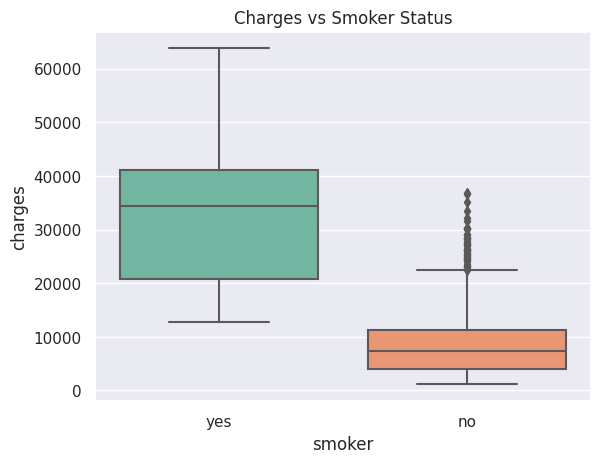

In [11]:
sns.boxplot(data=df_insurance, x='smoker', y='charges', palette='Set2')
plt.title('Charges vs Smoker Status')
plt.show()

Inference:

1. This is strong evidence that smoker status significantly affects charges.

2. You could use t-tests here to statistically validate the difference.

3. This feature is critical for your regression model.

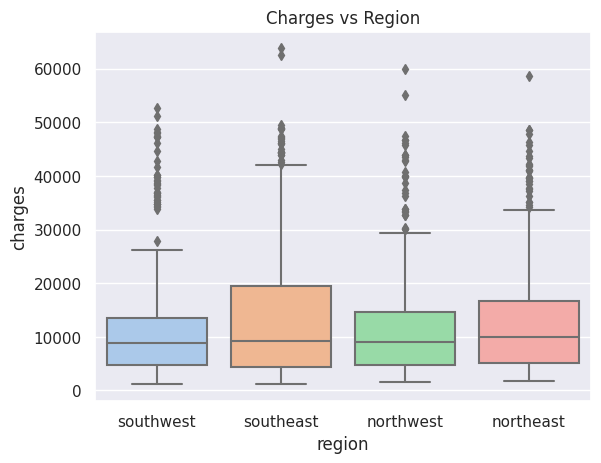

In [12]:
sns.boxplot(data=df_insurance, x='region', y='charges', palette='pastel')
plt.title('Charges vs Region')
plt.show()

Inference: 
1. Region has some effect, but not dramatic.

2. Southeast region has a slightly higher median and more outliers.

3. Region may not be very predictive on its own.

4. It’s still categorical, so we’ll encode it, but maybe not a top feature.



Lets transform data and check relationship with sex as well.

In [13]:
# Create a copy of the original dataframe to preserve it
df_transformed = df_insurance.copy()

# Map smoker column: 'yes' -> 1, 'no' -> 0
df_transformed['smoker'] = df_transformed['smoker'].map({'yes': 1, 'no': 0})

# Map sex column: 'male' -> 0, 'female' -> 1
df_transformed['sex'] = df_transformed['sex'].map({'male': 0, 'female': 1})

df_transformed.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


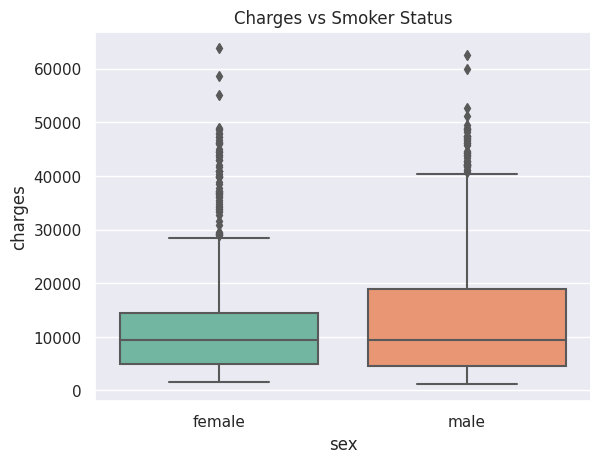

In [14]:
sns.boxplot(data=df_insurance, x='sex', y='charges', palette='Set2')
plt.title('Charges vs Smoker Status')
plt.show()

Inference:

1. Charges remain same for female and male.

In [15]:
set(df_transformed["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [16]:
#One Hot Encoding for Region

df_transformed = pd.get_dummies(df_transformed, columns=['region'])
df_transformed.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False
5,31,1,25.740,0,0,3756.62160,False,False,True,False
6,46,1,33.440,1,0,8240.58960,False,False,True,False
7,37,1,27.740,3,0,7281.50560,False,True,False,False
8,37,0,29.830,2,0,6406.41070,True,False,False,False
9,60,1,25.840,0,0,28923.13692,False,True,False,False


In [17]:
df_transformed.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

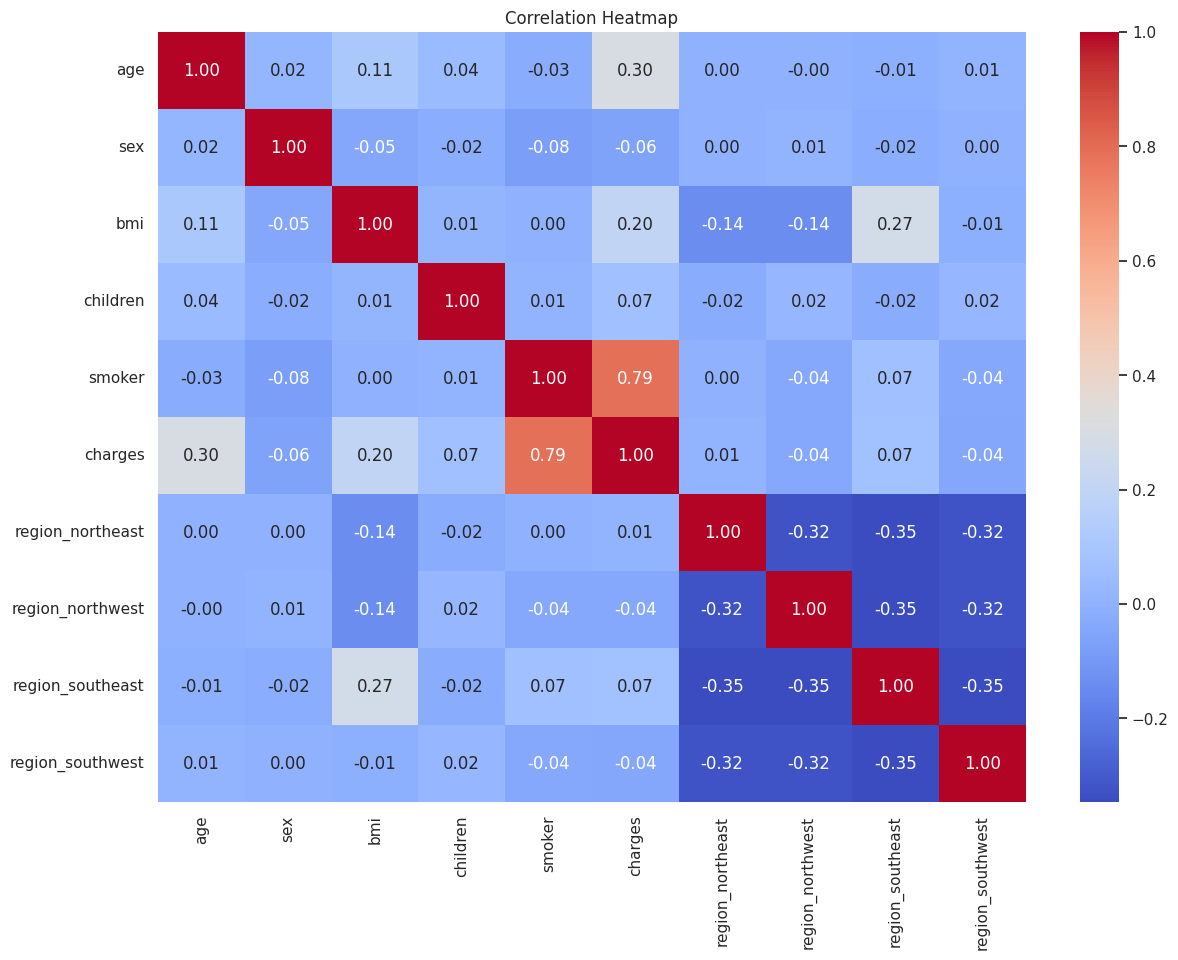

In [18]:
# Compute correlation matrix
corr = df_transformed[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','region_northeast', 'region_northwest', 'region_southeast','region_southwest']].corr()

plt.figure(figsize=(14, 10))

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Inference:**

**1. From this heatmap, scatterplots and boxplots we understand importance of which features are necessary for predicting charges.**

**2. Important features are: smoker(0.79), age(0.3), bmi(0.2)**

## Performing Tests (Optional if sure about variables)

### T - Test

In [19]:
smoker_charges = df_transformed[df_transformed['smoker'] == 1]['charges']
nonsmoker_charges = df_transformed[df_transformed['smoker'] == 0]['charges']

t_stat_smoker, p_val_smoker = ttest_ind(smoker_charges, nonsmoker_charges)
print(f"T-statistic Smoker: {t_stat_smoker}, P-value: {p_val_smoker}")

T-statistic Smoker: 46.664921172723716, P-value: 8.271435842177219e-283


### Pearson Test

In [20]:
corr_bmi, p_bmi = pearsonr(df_transformed['bmi'], df_transformed['charges'])
print(f"BMI: Correlation = {corr_bmi:.2f}, P-value = {p_bmi:.3f}")

corr_age, p_age = pearsonr(df_transformed['age'], df_transformed['charges'])
print(f"Age: Correlation = {corr_age:.2f}, P-value = {p_age:.3f}")

BMI: Correlation = 0.20, P-value = 0.000
Age: Correlation = 0.30, P-value = 0.000


#### By Graph we'll see if there's a clear trend or slope, which supports your Pearson result.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


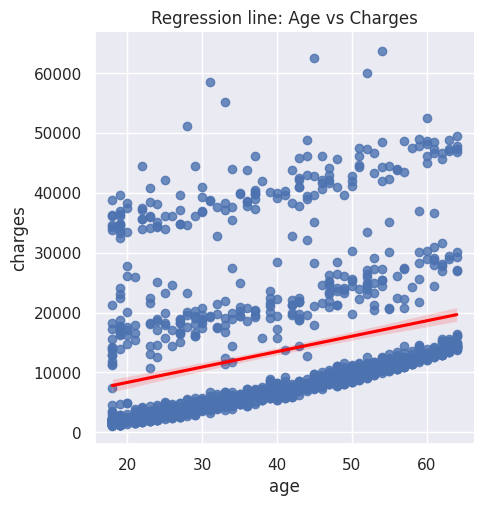

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


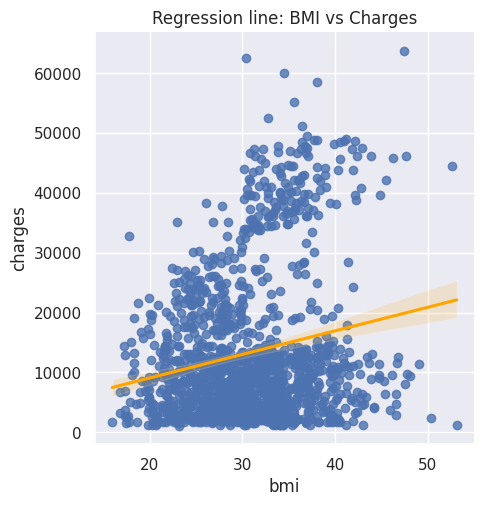

In [21]:
sns.lmplot(data=df_transformed, x='age', y='charges', line_kws={"color":"red"})
plt.title('Regression line: Age vs Charges')
plt.show()

sns.lmplot(data=df_transformed, x='bmi', y='charges', line_kws={"color":"orange"})
plt.title('Regression line: BMI vs Charges')
plt.show()

**Inference: From the above tests we understand that `BMI` has low co-relation and `age` has medium co-relation. `smoker` will be very significant.**

## Data Preprocessing

In [22]:
df_transformed.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False
5,31,1,25.740,0,0,3756.62160,False,False,True,False
6,46,1,33.440,1,0,8240.58960,False,False,True,False
7,37,1,27.740,3,0,7281.50560,False,True,False,False
8,37,0,29.830,2,0,6406.41070,True,False,False,False
9,60,1,25.840,0,0,28923.13692,False,True,False,False


### Feature Scaling

In [23]:
features_to_scale = ['age', 'bmi']

scaler = StandardScaler()

df_scaled = df_transformed.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_transformed[features_to_scale])

df_scaled.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,1,-0.453320,0,1,16884.92400,False,False,False,True
1,-1.509965,0,0.509621,1,0,1725.55230,False,False,True,False
2,-0.797954,0,0.383307,3,0,4449.46200,False,False,True,False
3,-0.441948,0,-1.305531,0,0,21984.47061,False,True,False,False
4,-0.513149,0,-0.292556,0,0,3866.85520,False,True,False,False


In [24]:
df_scaled.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'children', 'sex'], axis=1, inplace=True)
df_scaled.head()

,age,bmi,smoker,charges
0,-1.438764,-0.453320,1,16884.92400
1,-1.509965,0.509621,0,1725.55230
2,-0.797954,0.383307,0,4449.46200
3,-0.441948,-1.305531,0,21984.47061
4,-0.513149,-0.292556,0,3866.85520


In [25]:
df_scaled.head(10)

,age,bmi,smoker,charges
0,-1.438764,-0.453320,1,16884.92400
1,-1.509965,0.509621,0,1725.55230
2,-0.797954,0.383307,0,4449.46200
3,-0.441948,-1.305531,0,21984.47061
4,-0.513149,-0.292556,0,3866.85520
5,-0.584350,-0.807656,0,3756.62160
6,0.483668,0.455486,0,8240.58960
7,-0.157143,-0.479567,0,7281.50560
8,-0.157143,-0.136714,0,6406.41070
9,1.480485,-0.791252,0,28923.13692


In [26]:
y = df_scaled['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
X = df_scaled.drop('charges', axis=1)

In [28]:
X.head(10)

,age,bmi,smoker
0,-1.438764,-0.453320,1
1,-1.509965,0.509621,0
2,-0.797954,0.383307,0
3,-0.441948,-1.305531,0
4,-0.513149,-0.292556,0
5,-0.584350,-0.807656,0
6,0.483668,0.455486,0
7,-0.157143,-0.479567,0
8,-0.157143,-0.136714,0
9,1.480485,-0.791252,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
print("Training Samples: ", len(X_train))
print("Testing Samples: ", len(X_test))

Training Samples:  1003
Testing Samples:  335


## Train Regression Models

| Model             | Like...                                                                |
| ----------------- | ---------------------------------------------------------------------- |
| **Linear**        | Asking one very smart friend who draws a straight line to guess        |
| **Ridge**         | Same friend, but he calms down a bit if he gets too excited            |
| **Lasso**         | Friend who says, “Nah, I don’t even need some of this info”            |
| **Decision Tree** | Playing 20 questions to zero in on your number                         |
| **Random Forest** | Asking 100 friends with different opinions and averaging their answers |

In [31]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    
    print(f"{model.__class__.__name__}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 30)

    return predictions

### Linear Regression

In [32]:
lr = LinearRegression()
lr_preds = evaluate_model(lr, X_train, X_test, y_train, y_test)
lr_rsd = y_test - lr_preds

LinearRegression
MAE: 4301.33
MSE: 35869180.71
R² Score: 0.7623
------------------------------


### Ridge Regression

In [33]:
ridge = Ridge(alpha=1.0)
ridge_preds = evaluate_model(ridge, X_train, X_test, y_train, y_test)
ridge_rsd = y_test - ridge_preds

Ridge
MAE: 4313.03
MSE: 35899904.31
R² Score: 0.7621
------------------------------


### Lasso Regression

In [34]:
lasso = Lasso(alpha=0.01)
lasso_preds = evaluate_model(lasso, X_train, X_test, y_train, y_test)
lasso_rsd = y_test - lasso_preds

Lasso
MAE: 4301.33
MSE: 35869188.04
R² Score: 0.7623
------------------------------


### Decision Tree Regressor

In [35]:
tree = DecisionTreeRegressor(random_state=42)
tree_preds = evaluate_model(tree, X_train, X_test, y_train, y_test)
tree_rsd = y_test - tree_preds

DecisionTreeRegressor
MAE: 2917.81
MSE: 35458059.14
R² Score: 0.7650
------------------------------


### Random Forest Regressor

In [36]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest_preds = evaluate_model(forest, X_train, X_test, y_train, y_test)
forest_rsd = y_test - forest_preds

RandomForestRegressor
MAE: 2839.15
MSE: 27654982.43
R² Score: 0.8167
------------------------------


Lets drop a non useful features to make our model more efficient.

In [37]:
def coefficients_l(model, X_train):
    coefficients = pd.Series(model.coef_, index=X_train.columns)
    coefficients = coefficients.sort_values()
    print(f"\n{model.__class__.__name__}")
    print(coefficients)

In [38]:
coefficients_l(lr, X_train)
coefficients_l(ridge, X_train)
coefficients_l(lasso, X_train)


LinearRegression
bmi        1991.686641
age        3681.749709
smoker    23668.497446
dtype: float64

Ridge
bmi        1990.202002
age        3676.029636
smoker    23524.244286
dtype: float64

Lasso
bmi        1991.677445
age        3681.739687
smoker    23668.435199
dtype: float64


In [39]:
def coefficients_f(model, X_train):
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    importances = importances.sort_values()
    
    print(importances)

In [40]:
coefficients_f(tree, X_train)
coefficients_f(forest, X_train)

age       0.142331
bmi       0.243841
smoker    0.613828
dtype: float64
age       0.140994
bmi       0.246134
smoker    0.612872
dtype: float64


Dropping Features is not possible as all of the are important and none of them seems to have coefficient near to 0.

## Model Evaluation

In [41]:
def plot_prediction_graphs(preds, model):
    sns.scatterplot(x=y_test, y=preds)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f"Predicted vs Actual Charges {model}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect line
    plt.show()

### Prediction Plotting

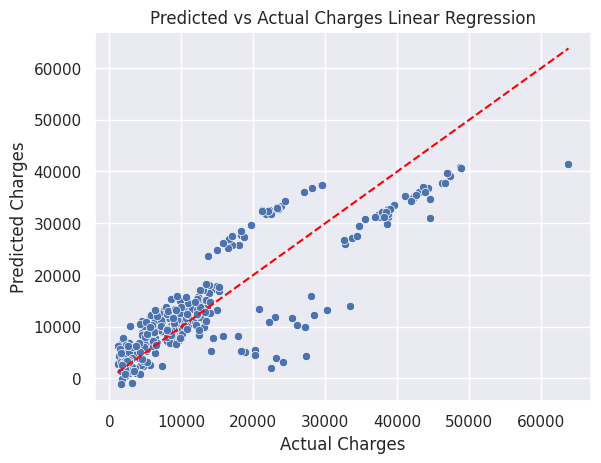

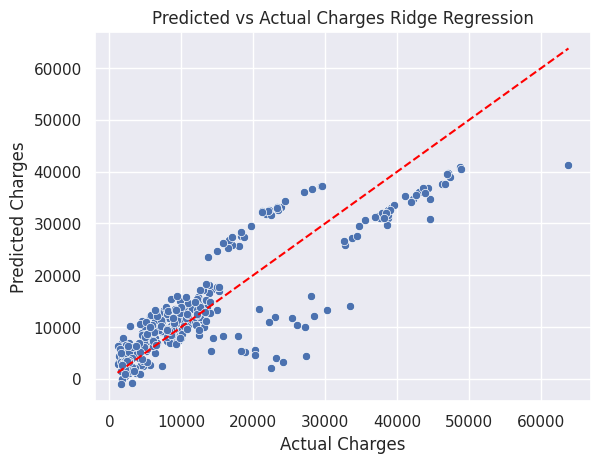

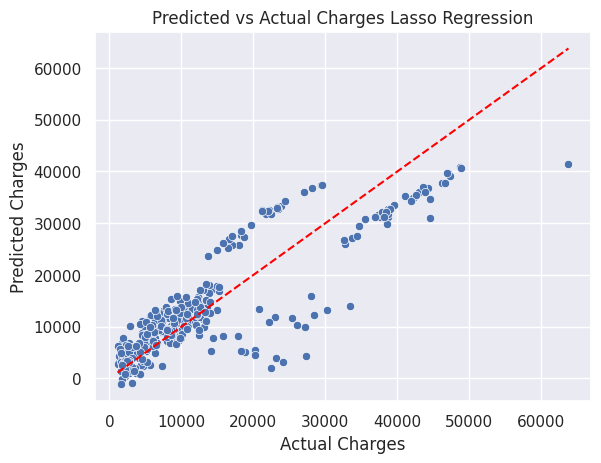

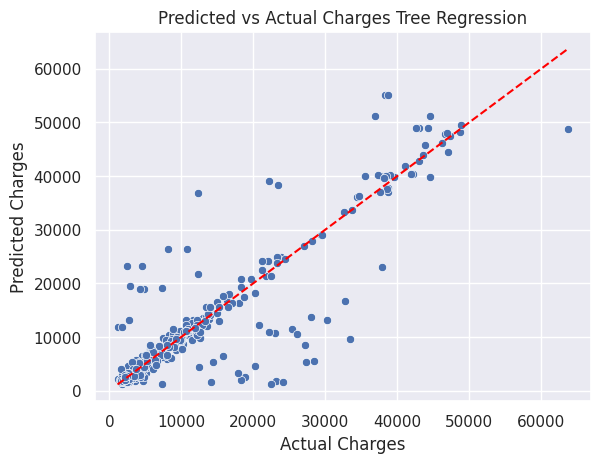

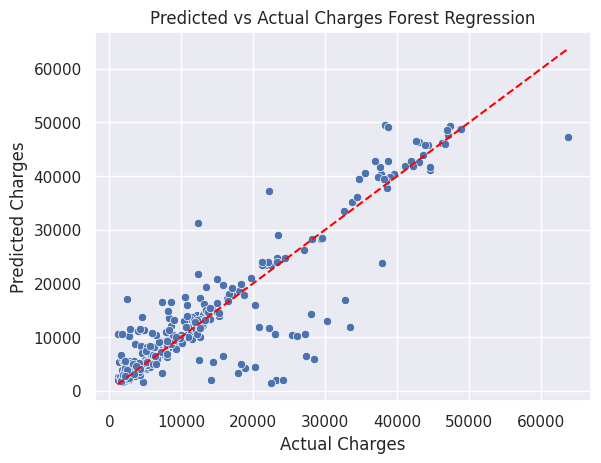

In [42]:
plot_prediction_graphs(lr_preds,"Linear Regression")
plot_prediction_graphs(ridge_preds, "Ridge Regression")
plot_prediction_graphs(lasso_preds, "Lasso Regression")
plot_prediction_graphs(tree_preds, "Tree Regression")
plot_prediction_graphs(forest_preds, "Forest Regression")

 If dots are close to red line, model is doing well.

### Residual Plotting

In [43]:
def plot_residual_graphs(predictions, residuals, model):
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Charges")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot {model}")
    plt.show()

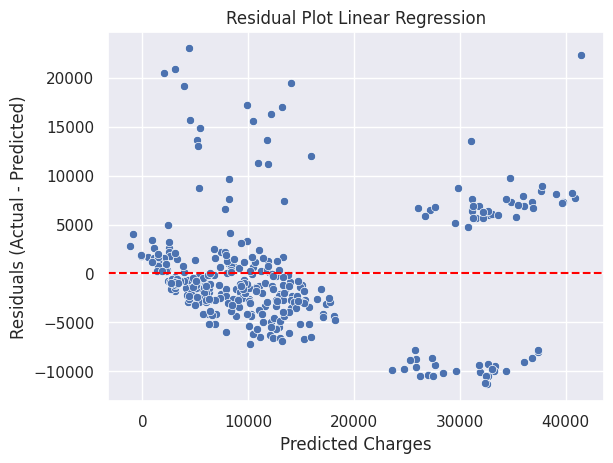

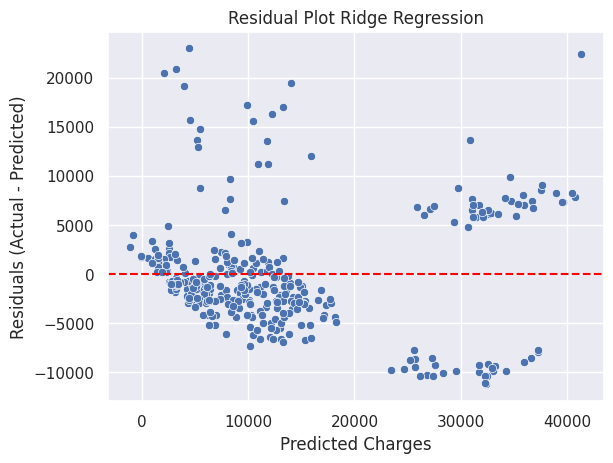

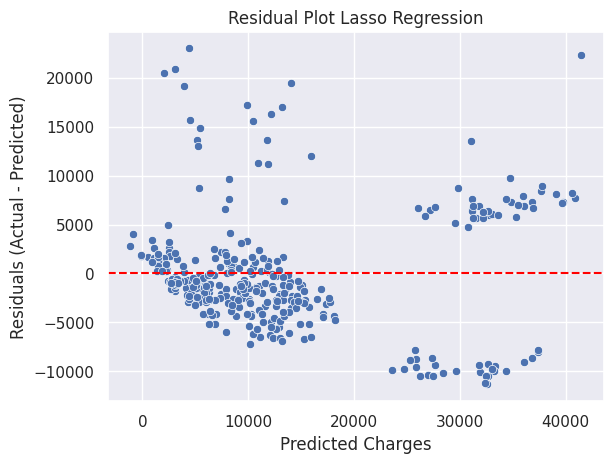

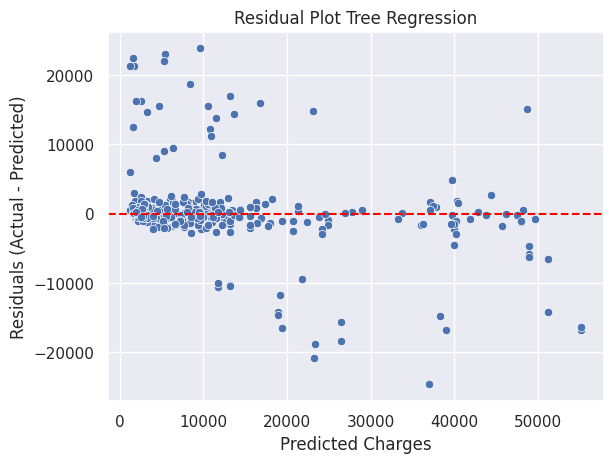

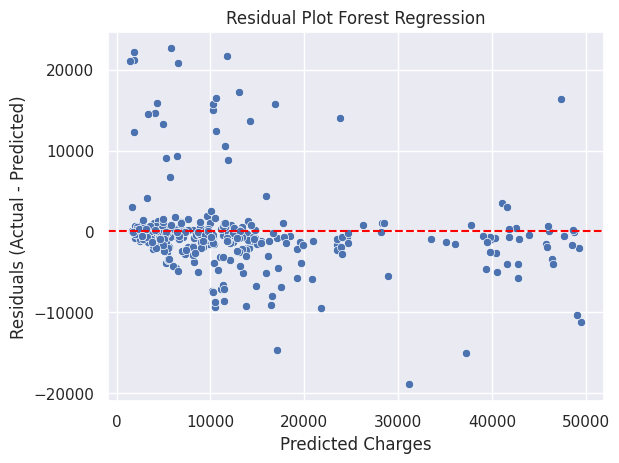

In [44]:
plot_residual_graphs(lr_preds, lr_rsd, "Linear Regression")
plot_residual_graphs(ridge_preds, ridge_rsd, "Ridge Regression")
plot_residual_graphs(lasso_preds, lasso_rsd, "Lasso Regression")
plot_residual_graphs(tree_preds, tree_rsd, "Tree Regression")
plot_residual_graphs(forest_preds, forest_rsd,"Forest Regression")

If the plot looks like random noise, that’s good.
If you see a curve or pattern → model is missing something (non-linearity, interaction, etc.)

## Insights + Explanation

### Model Performance Summary

| Model                 | MAE     | MSE    | R² Score |
| --------------------- | ------- | ------ | -------- |
| **Linear Regression** | 4301.33 | 35.87M | 0.7623   |
| **Ridge**             | 4313.03 | 35.90M | 0.7621   |
| **Lasso**             | 4301.33 | 35.87M | 0.7623   |
| **Decision Tree**     | 2917.81 | 35.45M | 0.7650   |
| **Random Forest**     | 2839.15 | 27.65M | 0.8167 ✅ |


## Feature Importance — What Drives Charges?

We've captured importance using both **linear model coefficients** and **tree-based feature importances**.

### 1. **From Linear Models (Interpret Coefficients in \$\$)**

These are approximate "dollar impacts" when other variables are constant:

| Feature    | Impact            |
| ---------- | ----------------- |
| **Smoker** | +\$23,668         |
| **Age**    | +\$3,681 per year |
| **BMI**    | +\$1,991 per unit |

**Insight**: Being a **smoker** increases your premium by **\~\$23,600**, even more than 10 years of aging!

### 2. **From Trees (Relative Importance, scaled 0–1)**

| Feature | Decision Tree | Random Forest |
| ------- | ------------- | ------------- |
| Smoker  | 61.3%         | 61.3%         |
| BMI     | 24.4%         | 24.6%         |
| Age     | 14.2%         | 14.1%         |

**Insight**: **Smoking status** is the single **most influential factor**, followed by BMI and age. Together, these 3 explain nearly **100%** of the model’s decisions.

### 3. **Insight Summary**

> * **Smokers pay, on average, nearly \$23,600 more per year** for insurance than non-smokers.
> * **Age** also plays a big role. Each additional year of age increases the cost by about **\$3,680**.
> * **BMI** matters — for each 1-point increase in BMI (e.g., from 30 to 31), the cost increases by around **\$1,990**.
> * Your **region or number of children** has minimal effect compared to smoking, age, and BMI.

## Build a simple Streamlit app where a user inputs values and sees predicted insurance charges.

### Save Models

In [45]:
import joblib

# Save model
joblib.dump(forest, 'insurance_model.pkl')

# Save scaler if you used one
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Streamlit App Code

In [46]:
%%writefile my_app.py

import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('insurance_model.pkl')
scaler = joblib.load('scaler.pkl')  # Assumes you scaled age and bmi

st.title("💰 Insurance Charges Predictor")

# --- User Inputs ---
age = st.slider("Age", 18, 100, 30)
bmi = st.slider("BMI", 15.0, 50.0, 25.0)
smoker = st.selectbox("Smoker", ["No", "Yes"])

# --- Encode Inputs ---
smoker = 1 if smoker == "Yes" else 0

# --- Scale age & bmi ---
scaled_values = scaler.transform([[bmi, age]])  # Assuming order: [bmi, age]
bmi_scaled, age_scaled = scaled_values[0]

# --- Final Input ---
X = np.array([[bmi_scaled, age_scaled, smoker]])

# --- Prediction ---
prediction = model.predict(X)[0]

# --- Output ---
st.subheader(f"Estimated Insurance Charges: **${prediction:,.2f}**")

Writing my_app.py
